## Walmart Sales Dataset Exploration

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


walmart =  pd.read_csv('walmart_cleaned.csv')

walmart.describe()

,Index,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,211611.321278,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,122195.149363,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,0.000000,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,105782.250000,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,211603.500000,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,317424.750000,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,423285.000000,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


In [2]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Index         421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  int64  
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(10), int64(6), object(1)
memory usage

In [3]:
#Checking for duplicates
dup = walmart.duplicated()
np.unique(dup)
# Since we only have a false value for every column in the data set so we don't have any duplicates

array([False])

**Variable Characteristics**

`Store` - the store number   
`Dept` - Department number in the store   
`Date` - the week of sales  `Numerical` (but we will extract days and month from it as well)  
`Weekly_Sales` - sales for the given store  `Numerical`  
`Holiday_Flag` - whether the week is a special holiday `Categorical` week 1 – Holiday week 0 – Non-holiday week  
`Temperature` - Temperature on the day of sale `Numerical`   
`Fuel_Price` - Cost of fuel in the region  `Numerical`  
`CPI` – Prevailing consumer price index  `Numerical`  
`Unemployment` - Prevailing unemployment rate  `Numerical`
`Size` - Size (sq.feet) of each store   
  
Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [4]:
# Finding the range median and mode of the numerical variables
walmart.head()


,Index,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2/5/2010,0,1,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2/5/2010,0,26,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2/5/2010,0,17,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2/5/2010,0,45,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2/5/2010,0,28,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


**Data Understanding**

* Temperature is in Fahrenheit
* Fuel Price in Dollars per Gallon (Might have a relationship with Arab Springs(2010-2012))
* `-ve values of sales`  
* `Markdown variables have missing values` 
* Size in square feet 
* Type 1 2 3 based on increasing sizes 
* CPI does not have an upper limit 
* Unemployment rate in percentage 


In [5]:
# Searching for missing values in markdowns
walmart['MarkDown1'].value_counts()
#walmart['MarkDown2'].value_counts()
#walmart['MarkDown3'].value_counts()
#walmart['MarkDown4'].value_counts()
#walmart['MarkDown5'].value_counts()

MarkDown1
0.00       270889
1.50          102
460.73        102
175.64         93
1282.42        75
            ...  
196.40         42
243.47         42
512.15         42
318.51         42
945.96         42
Name: count, Length: 2278, dtype: int64

In [6]:
# Checking for the negative values in weekly sales 
negatives_in_walmart = walmart[walmart['Weekly_Sales'] < 0]
negatives_in_walmart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1285 entries, 182 to 421131
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         1285 non-null   int64  
 1   Store         1285 non-null   int64  
 2   Date          1285 non-null   object 
 3   IsHoliday     1285 non-null   int64  
 4   Dept          1285 non-null   int64  
 5   Weekly_Sales  1285 non-null   float64
 6   Temperature   1285 non-null   float64
 7   Fuel_Price    1285 non-null   float64
 8   MarkDown1     1285 non-null   float64
 9   MarkDown2     1285 non-null   float64
 10  MarkDown3     1285 non-null   float64
 11  MarkDown4     1285 non-null   float64
 12  MarkDown5     1285 non-null   float64
 13  CPI           1285 non-null   float64
 14  Unemployment  1285 non-null   float64
 15  Type          1285 non-null   int64  
 16  Size          1285 non-null   int64  
dtypes: float64(10), int64(6), object(1)
memory usage: 180.7+ KB


**Missing and Awkward values**
* The Effect of na values in markdowns will be seen in data anlysis
* There can be different possibilities of the -ve values such as discounts on holidays, markdown events etc.

## Data Analysis

In [7]:
# Adding additional features of year and month using the date variable 
# Convert 'Date' column to datetime
walmart['Date'] = pd.to_datetime(walmart['Date'])

# Extract the Year and month
walmart['Year'] = walmart['Date'].dt.year
walmart['Month'] = walmart['Date'].dt.month
walmart['Week_of_year'] = walmart['Date'].dt.isocalendar().week

In [8]:
walmart['Week_of_year'].value_counts().shape

(52,)

<Axes: >

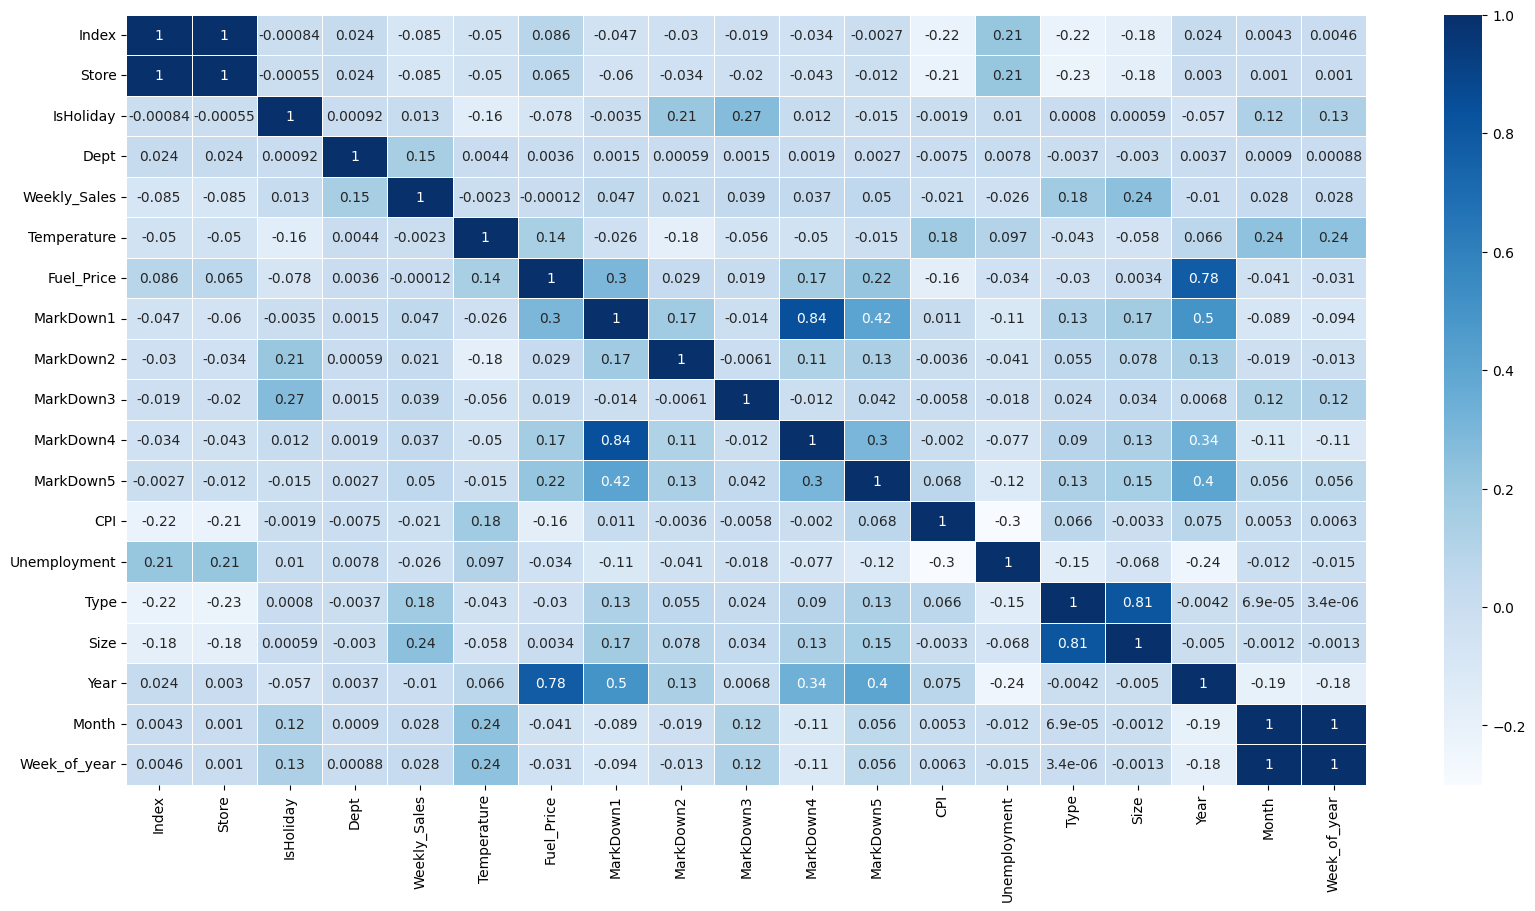

In [9]:
# Checking the relation between the variables 
correlation_matrix = walmart.drop('Date', axis = 1 ).corr()

#Creating the heatmap
plt.figure(figsize=(20, 10))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, annot=True,cmap='Blues' , linewidths=0.5)


In [10]:
'''pd.plotting.scatter_matrix(walmart, figsize=(20,10));'''

'pd.plotting.scatter_matrix(walmart, figsize=(20,10));'

## Model Training

* Using week of year for model training and eliminating date, year, month 
* The 5 Markdown features are hardly affecting the sales they are eliminated in the model training
* Doing One hot encoding for department and store 
* Removing the Type variable and using size as a substitute 
* We have interation terms 

In [10]:
walmart_for_model =  walmart.drop(columns=['Year', 'Month', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'Type', 'Store'])

In [11]:
# Encoding store and departments
walmart_for_model['Weights'] = np.where(walmart_for_model['IsHoliday'] == 1, 5, 1)
walmart_for_model = pd.get_dummies(walmart_for_model, columns=['Dept'], drop_first=True)

In [12]:
walmart_for_model['Weights'].value_counts()

Weights
1    391909
5     29661
Name: count, dtype: int64

`Choosing Weighted Mean Absolute Error(WMAE) as an error metric`

In [13]:
# Making the error metric weighted mean absolute error (WMAE)
# weight = 5 for Holiday week and weight = 1 for Non Holiday week

def weighted_mean_absolute_error(y_true, y_pred, weights):
    '''# Ensure all inputs are numpy arrays for element-wise operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    weights = np.array(weights)
    
    # Calculate the absolute errors
    absolute_errors = np.abs(y_true - y_pred)
    
    # Calculate WMAE
    wmae = np.sum(weights * absolute_errors) / np.sum(weights)'''
    return (weights * abs(y_true - y_pred)).sum() / weights.sum()


In [14]:

# Making the train test split w.r.t. time 
train_data = walmart_for_model[walmart_for_model['Date'] < '2012-01-01']
test_data = walmart_for_model[walmart_for_model['Date'] >= '2012-01-01']

def splitter(train_data, test_data):
    train_data = train_data.drop(columns=['Date'])
    test_data = test_data.drop(columns=['Date'])

    # Splitting the train and test data into X and y
    X_train = train_data.drop(columns=['Weekly_Sales'])
    X_test = test_data.drop(columns=['Weekly_Sales'])
    y_train = train_data['Weekly_Sales'] 
    y_test =  test_data['Weekly_Sales']
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = splitter(train_data, test_data)

In [17]:
# Integrating wmae with sklear's random forest regressor
def wmae_scorer(y_true, y_pred):
    return weighted_mean_absolute_error(y_true, y_pred, X_train['Weights'])

custom_wmae = make_scorer(wmae_scorer, greater_is_better=False)


### Random Forests

In [17]:

# Instantiate the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Using Grid search to find the best depth
grid_search = GridSearchCV(estimator=rf, param_grid={'max_depth': [5, 10, 15, 20, 25, 30, None]}, cv=5, scoring=custom_wmae, n_jobs=-1)


# Train the model
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best max_depth:", best_params['max_depth'])


Best max_depth: None


In [18]:
final_rf = RandomForestRegressor(n_estimators=100, random_state=42)
final_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
'''importances = final_rf.feature_importances_
feature_names = walmart_for_model.columns
indices = np.argsort(importances)[::-1]

sorted_feature_names = np.array(feature_names)[indices]

indices = np.argsort(importances)[::-1]

    # Rearrange feature names according to sorted importances
sorted_feature_names = np.array(feature_names)[indices]
# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names, importances[indices], color='skyblue')
plt.title('Feature Importances from Random Forest (sklearn)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()'''

"importances = final_rf.feature_importances_\nfeature_names = walmart_for_model.columns\nindices = np.argsort(importances)[::-1]\n\nsorted_feature_names = np.array(feature_names)[indices]\n\nindices = np.argsort(importances)[::-1]\n\n    # Rearrange feature names according to sorted importances\nsorted_feature_names = np.array(feature_names)[indices]\n# Plot the feature importances\nplt.figure(figsize=(12, 8))\nplt.barh(sorted_feature_names, importances[indices], color='skyblue')\nplt.title('Feature Importances from Random Forest (sklearn)')\nplt.xlabel('Importance')\nplt.ylabel('Feature')\nplt.gca().invert_yaxis()  # To display the most important feature at the top\nplt.show()"

In [19]:
#Predict on the train data 
y_pred_train = final_rf.predict(X_train)
# Predict on the test data  
y_pred_test = final_rf.predict(X_test)

# Calculate performance (e.g., RMSE)
wmae_train = weighted_mean_absolute_error(y_train, y_pred_train, X_train['Weights'])
wmae_test = weighted_mean_absolute_error(y_test, y_pred_test, X_test['Weights'])

In [20]:
'''# Using type and size both as varibles
mean_y_train = np.mean(y_train)
train_accuracy = 100 - (rmse_train / mean_y_train) * 100

mean_y_test = np.mean(y_test)
test_accuracy = 100 - (rmse_test / mean_y_test) * 100

print(f"Train RMSE: {rmse_train}")
print(f"Train Accuracy: {train_accuracy:.2f}%\n")

print(f"Test RMSE: {rmse_test}")
print(f"Test Accuracy: {test_accuracy:.2f}%")'''

'# Using type and size both as varibles\nmean_y_train = np.mean(y_train)\ntrain_accuracy = 100 - (rmse_train / mean_y_train) * 100\n\nmean_y_test = np.mean(y_test)\ntest_accuracy = 100 - (rmse_test / mean_y_test) * 100\n\nprint(f"Train RMSE: {rmse_train}")\nprint(f"Train Accuracy: {train_accuracy:.2f}%\n")\n\nprint(f"Test RMSE: {rmse_test}")\nprint(f"Test Accuracy: {test_accuracy:.2f}%")'

In [21]:
# After removing the type and size variable

mean_y_train = np.mean(y_train)
train_accuracy = 100 - (wmae_train / mean_y_train) * 100

mean_y_test = np.mean(y_test)
test_accuracy = 100 - (wmae_test / mean_y_test) * 100

print(f"Train WMAE: {wmae_train}")
print(f"Train Accuracy: {train_accuracy:.2f}%\n")

print(f"Test WMAE: {wmae_test}")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Train WMAE: 676.0709421588138
Train Accuracy: 95.80%

Test WMAE: 2622.9620981164003
Test Accuracy: 83.29%


**Using the WMAE and default depth of the tree**  
Train WMAE: 654.1338130164459  
Train Accuracy: 95.94%  
  
Test WMAE: 2236.990195544791  
Test Accuracy: 85.75%  



Testting Random forest with a different set of train and test 

In [22]:
# Making the train test split w.r.t. time 
train_data = walmart_for_model[walmart_for_model['Date'] >= '2011-01-01']
test_data = walmart_for_model[walmart_for_model['Date'] < '2011-01-01']
train_data = train_data.drop(columns=['Date'])
test_data = test_data.drop(columns=['Date'])

# Splitting the train and test data into X and y
X_train = train_data.drop(columns=['Weekly_Sales'])
X_test = test_data.drop(columns=['Weekly_Sales'])
y_train = train_data['Weekly_Sales'] 
y_test =  test_data['Weekly_Sales']

In [23]:
final_rf = RandomForestRegressor(n_estimators=100, random_state=42)
final_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
#Predict on the train data 
y_pred_train = final_rf.predict(X_train)
# Predict on the test data  
y_pred_test = final_rf.predict(X_test)

# Calculate performance (e.g., RMSE)
wmae_train = weighted_mean_absolute_error(y_train, y_pred_train, X_train['Weights'])
wmae_test = weighted_mean_absolute_error(y_test, y_pred_test, X_test['Weights'])

# After removing the type and size variable

mean_y_train = np.mean(y_train)
train_accuracy = 100 - (wmae_train / mean_y_train) * 100

mean_y_test = np.mean(y_test)
test_accuracy = 100 - (wmae_test / mean_y_test) * 100

print(f"Train WMAE: {wmae_train}")
print(f"Train Accuracy: {train_accuracy:.2f}%\n")

print(f"Test WMAE: {wmae_test}")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Train WMAE: 634.6645446508473
Train Accuracy: 95.99%

Test WMAE: 3177.0498417196113
Test Accuracy: 80.47%


**Observation:**

Random forests are giving consistent test results for different test samples. 
Train WMAE: 634.6645446508473
Train Accuracy: 95.99%

Test WMAE: 3177.0498417196113
Test Accuracy: 80.47%

### Boosting

In [15]:
train_data = walmart_for_model[walmart_for_model['Date'] < '2012-01-01']
test_data = walmart_for_model[walmart_for_model['Date'] >= '2012-01-01']

X_train, X_test, y_train, y_test = splitter(train_data, test_data)

In [18]:
# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [3, 5, 7, 9],  # Tree depth
    'learning_rate': [0.05, 0.01, 0.005],  # Shrinkage for updating trees
    'subsample': [0.6, 1.0],  # Fraction of samples used for each tree
}

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring=custom_wmae, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Gradient Boosting Model
best_gbr = grid_search.best_estimator_

# Predict on the test set
y_pred = best_gbr.predict(X_test)

# Calculate WMAE on the test set
weights = walmart_for_model['Weights'].loc[X_test.index]
wmae_value = weighted_mean_absolute_error(y_test, y_pred, weights)

# Output the results
print("Best Gradient Boosting Parameters: ", grid_search.best_params_)
print("WMAE on test set: ", wmae_value)


Best Gradient Boosting Parameters:  {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 200, 'subsample': 1.0}
WMAE on test set:  4717.093647384256


In [31]:
#Predict on the train data 
y_pred_train = best_gbr.predict(X_train)
# Predict on the test data  
y_pred_test = best_gbr.predict(X_test)

# Calculate performance (e.g., RMSE)
wmae_train = weighted_mean_absolute_error(y_train, y_pred_train, X_train['Weights'])
wmae_test = weighted_mean_absolute_error(y_test, y_pred_test, X_test['Weights'])

# After removing the type and size variable

mean_y_train = np.mean(y_train)
train_accuracy = 100 - (wmae_train / mean_y_train) * 100

mean_y_test = np.mean(y_test)
test_accuracy = 100 - (wmae_test / mean_y_test) * 100

print(f"Train WMAE: {wmae_train}")
print(f"Train Accuracy: {train_accuracy:.2f}%\n")

print(f"Test WMAE: {wmae_test}")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train WMAE: 4120.133534806778
Train Accuracy: 74.42%

Test WMAE: 4717.093647384256
Test Accuracy: 69.95%


After minor tuning

Train WMAE: 4835.225127293159
Train Accuracy: 69.98%

Test WMAE: 5056.53424351903
Test Accuracy: 67.78%

After major tuning 
Best Gradient Boosting Parameters:  {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 200, 'subsample': 1.0}
WMAE on test set:  4717.093647384256
Train WMAE: 4120.133534806778
Train Accuracy: 74.42%

Test WMAE: 4717.093647384256
Test Accuracy: 69.95%

**TEST**

In [ ]:
test = pd.DataFrame()